In [7]:
!pip install --upgrade numpy pandas matplotlib seaborn gensim scikit-learn tqdm nltk scipy joblib gdown --quiet

In [8]:
import requests
import gdown
import zipfile
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from tqdm import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
file_id = "1qf2VHJfHMNzUKpy7KxkadqLb8zWAqxDD"
output_path = "./cyberbullying_dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False, fuzzy=True)
print("Download complete!")


Downloading...
From: https://drive.google.com/uc?id=1qf2VHJfHMNzUKpy7KxkadqLb8zWAqxDD
To: c:\Users\DELL\Desktop\Projects\NLP--course-work-assessment-1\cyberbullying_dataset.zip
100%|██████████| 1.08M/1.08M [00:00<00:00, 6.88MB/s]

Download complete!


In [10]:
zip_path = "./cyberbullying_dataset.zip"
extract_folder = "./"

os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File extracted to: {extract_folder}")

File extracted to: ./


In [11]:
imported_df = pd.read_csv('./cyberbullying_dataset.csv')
imported_df.columns = imported_df.columns.str.lower()
imported_df.head()

,comment,label,race,religion,gender,sexual orientation,miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,NaN
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,NaN
4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,NaN


In [12]:
imported_df.shape

(20109, 7)

# **Exploratory Data Analysis**

In [13]:
imported_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20109 entries, 0 to 20108
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comment             20109 non-null  object
 1   label               20109 non-null  object
 2   race                20109 non-null  object
 3   religion            20109 non-null  object
 4   gender              20109 non-null  object
 5   sexual orientation  20109 non-null  object
 6   miscellaneous       3533 non-null   object
dtypes: object(7)
memory usage: 1.1+ MB


In [14]:
# dropping the 'miscellaneous' column as it has a lot of null values
new_df = imported_df.drop(columns=['miscellaneous'])
new_df.columns

Index(['comment', 'label', 'race', 'religion', 'gender', 'sexual orientation'], dtype='object')

In [15]:
# check if labels are balanced or imbalanced
new_df['label'].value_counts()

label
normal        7818
hatespeech    6484
offensive     5807
Name: count, dtype: int64

In [16]:
new_df['label'] = new_df['label'].replace({'hatespeech': 'offensive'})
new_df['label'].value_counts()

label
offensive    12291
normal        7818
Name: count, dtype: int64

# **EDA =>  Univariant Analysis**

**Conclusions**
- Data is slightly imbalanced with two labels Normal and Offensive having ratio of 38.9%, 61.1% repectively
- Gender, Religion and Sexual Orientation columns have more than 75% cells with unspecified information
- Race column might have correlation with target labels as the ratio of unspecific data is less than 70% or the ratio of specific data is more than 30%.

In [17]:
new_df.columns

Index(['comment', 'label', 'race', 'religion', 'gender', 'sexual orientation'], dtype='object')

In [18]:
new_df['label'].value_counts()

label
offensive    12291
normal        7818
Name: count, dtype: int64

In [19]:
new_df['race'].value_counts()

race
No_race       13579
African        3769
Arab           1172
Caucasian       802
Asian           400
Hispanic        313
Indigenous       42
Indian           32
Name: count, dtype: int64

In [20]:
new_df['religion'].value_counts()

religion
Nonreligious    15387
Islam            2559
Jewish           1950
Christian         163
Hindu              42
Buddhism            8
Name: count, dtype: int64

In [21]:
new_df['gender'].value_counts()

gender
No_gender    16380
Women         2262
Men           1467
Name: count, dtype: int64

In [22]:
new_df['sexual orientation'].value_counts()

sexual orientation
No_orientation    17827
Homosexual         2163
Heterosexual        113
Asexual               4
Bisexual              2
Name: count, dtype: int64

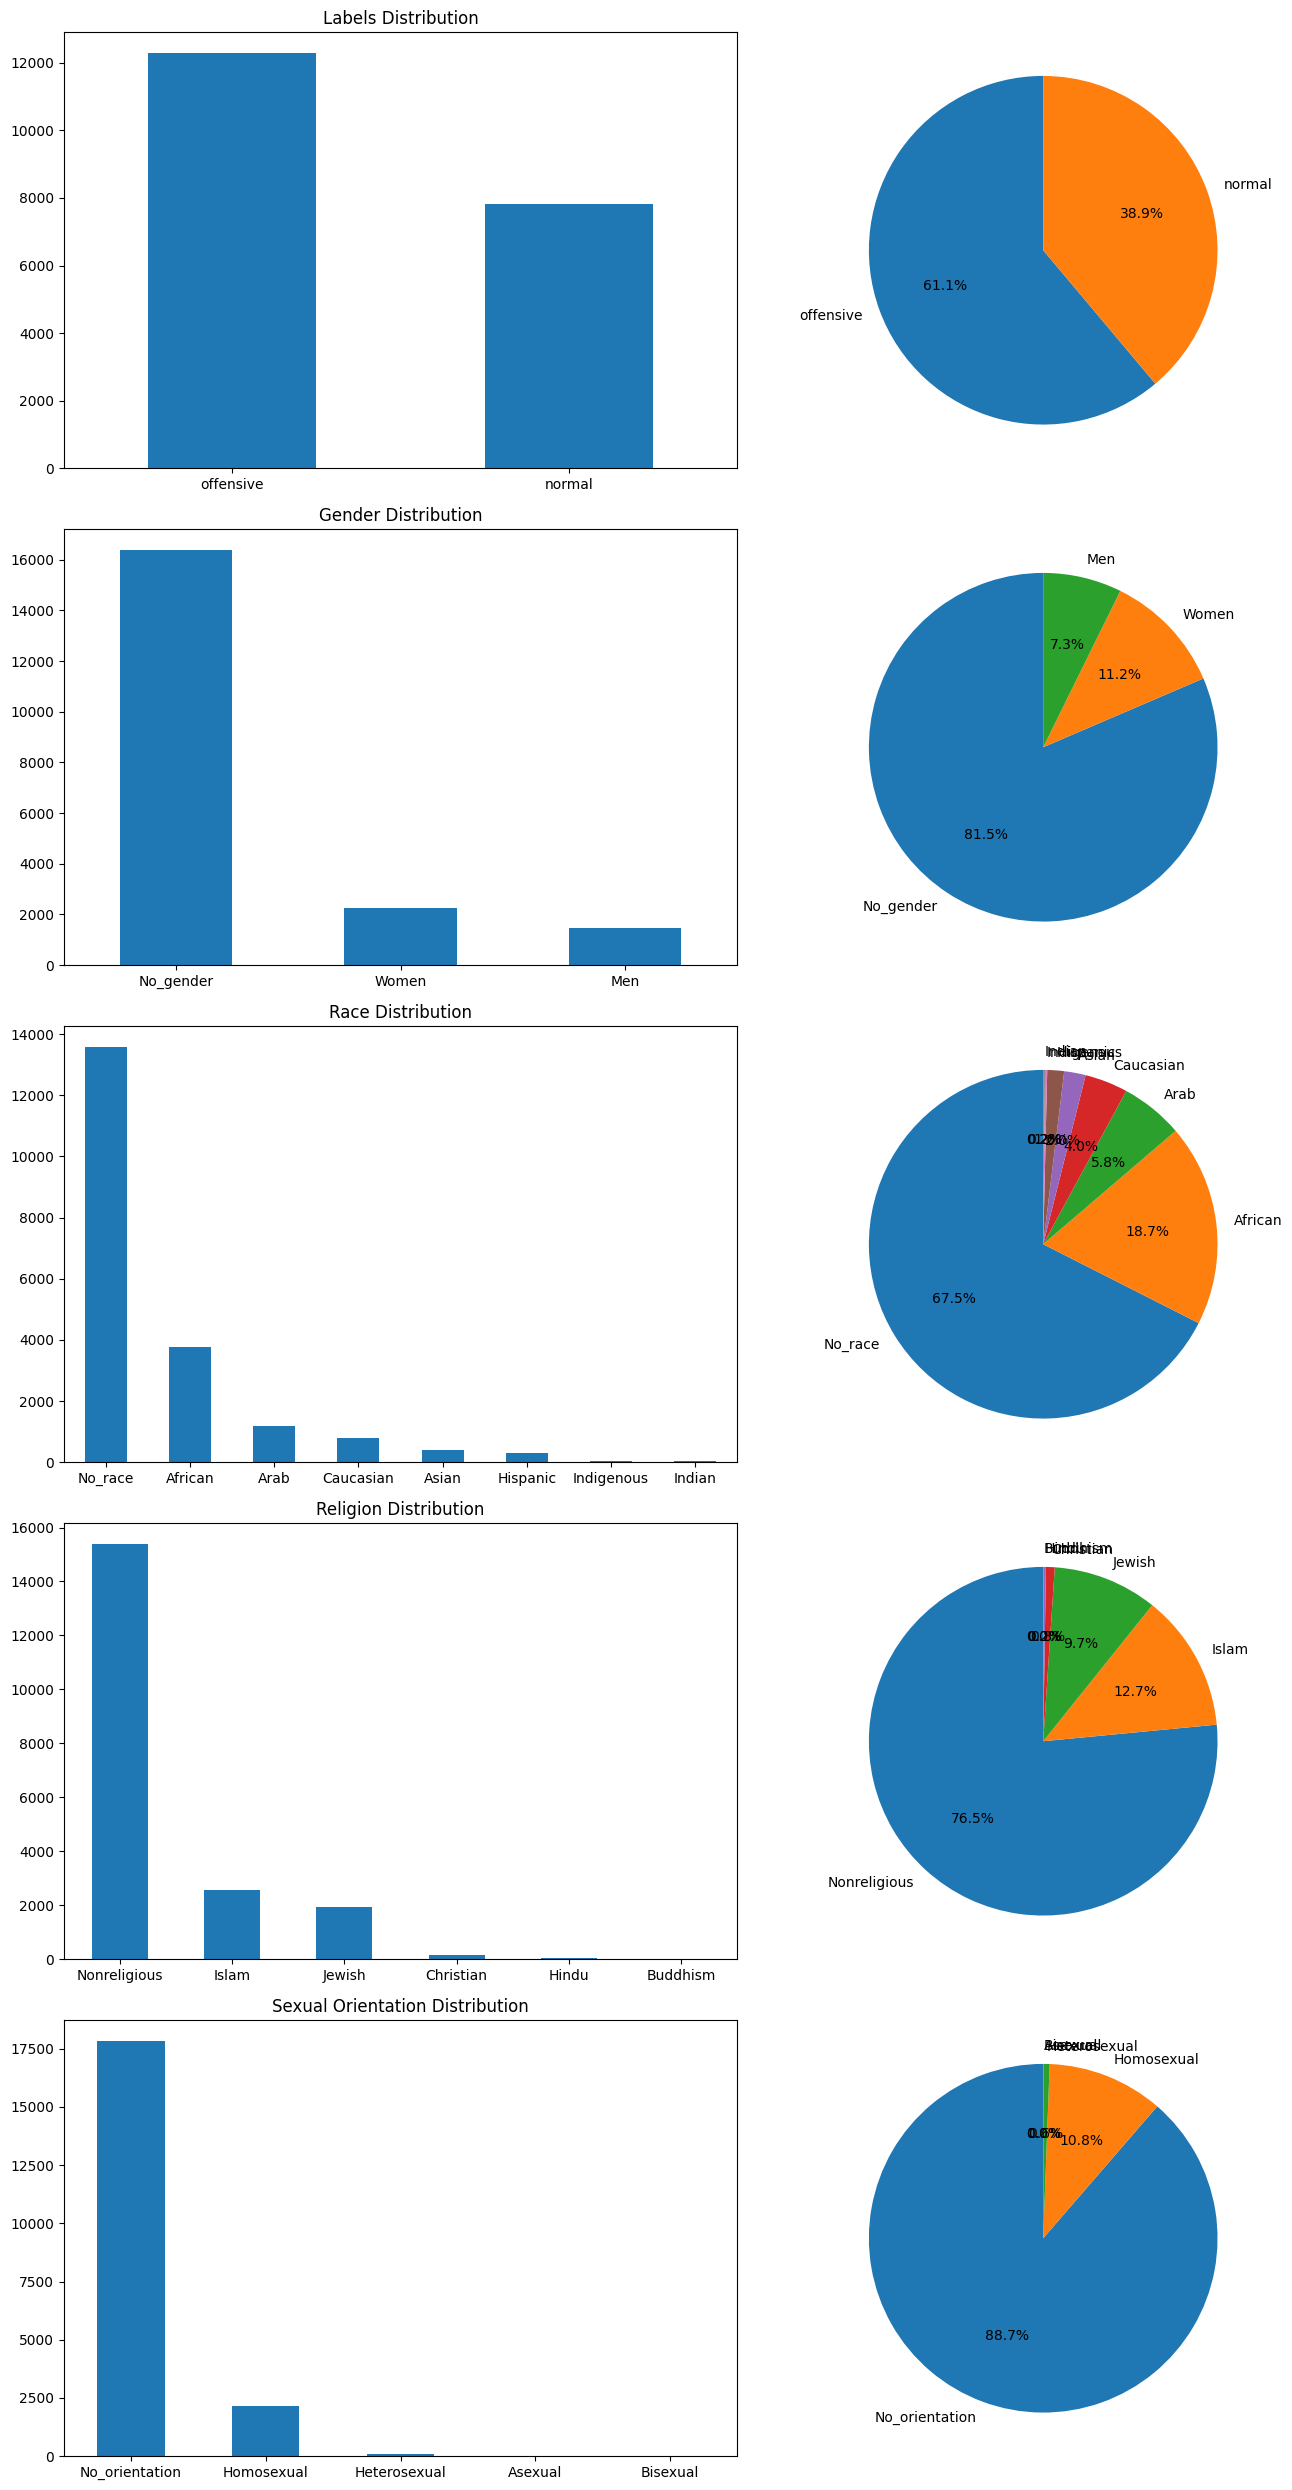

In [23]:
categories = {
    "Labels": new_df['label'].value_counts(),
    "Gender": new_df['gender'].value_counts(),
    "Race": new_df['race'].value_counts(),
    "Religion": new_df['religion'].value_counts(),
    "Sexual Orientation": new_df['sexual orientation'].value_counts()
}

fig, ax = plt.subplots(5, 2, figsize=(14, 25))

for i, (category, data) in enumerate(categories.items()):
    data.plot(kind='bar', ax=ax[i, 0])
    ax[i, 0].set_title(f"{category} Distribution")
    ax[i, 0].set_xlabel("")
    ax[i, 0].tick_params(axis='x', rotation=0)
    ax[i, 1].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

# **EDA => Bivariant Analysis**

- We can see clear correlation of different columns with target label
- In gender the ratio of hate speech used by Women is much greater as compared to Men
- In religion column, Jewish, Hindu, Islam has more percentage of offensive comments as compared to normal comments
- Ratio of offensive comments given by Indians, Arabs and Africans is higher
- In orientation, Bi-sexuals have higher hate speech ratio as compared to normal comments

In [24]:
gender_label_relation = pd.crosstab(new_df['label'], new_df['gender'], normalize='columns') * 100
gender_label_relation

gender,Men,No_gender,Women
label,,,
normal,32.106339,42.936508,13.881521
offensive,67.893661,57.063492,86.118479


In [25]:
religion_label_relation = pd.crosstab(new_df['label'], new_df['religion'], normalize='columns') * 100
religion_label_relation

religion,Buddhism,Christian,Hindu,Islam,Jewish,Nonreligious
label,,,,,,
normal,0.0,31.288344,26.190476,11.762407,6.102564,47.67661
offensive,100.0,68.711656,73.809524,88.237593,93.897436,52.32339


In [26]:
race_label_relation = pd.crosstab(new_df['label'], new_df['race'], normalize='columns') * 100
race_label_relation

race,African,Arab,Asian,Caucasian,Hispanic,Indian,Indigenous,No_race
label,,,,,,,,
normal,8.755638,6.996587,23.0,24.812968,5.43131,0.0,9.52381,52.242433
offensive,91.244362,93.003413,77.0,75.187032,94.56869,100.0,90.47619,47.757567


In [27]:
orientation_label_relation = pd.crosstab(new_df['label'], new_df['sexual orientation'], normalize='columns') * 100
orientation_label_relation

sexual orientation,Asexual,Bisexual,Heterosexual,Homosexual,No_orientation
label,,,,,
normal,0.0,0.0,9.734513,15.672677,41.891513
offensive,100.0,100.0,90.265487,84.327323,58.108487


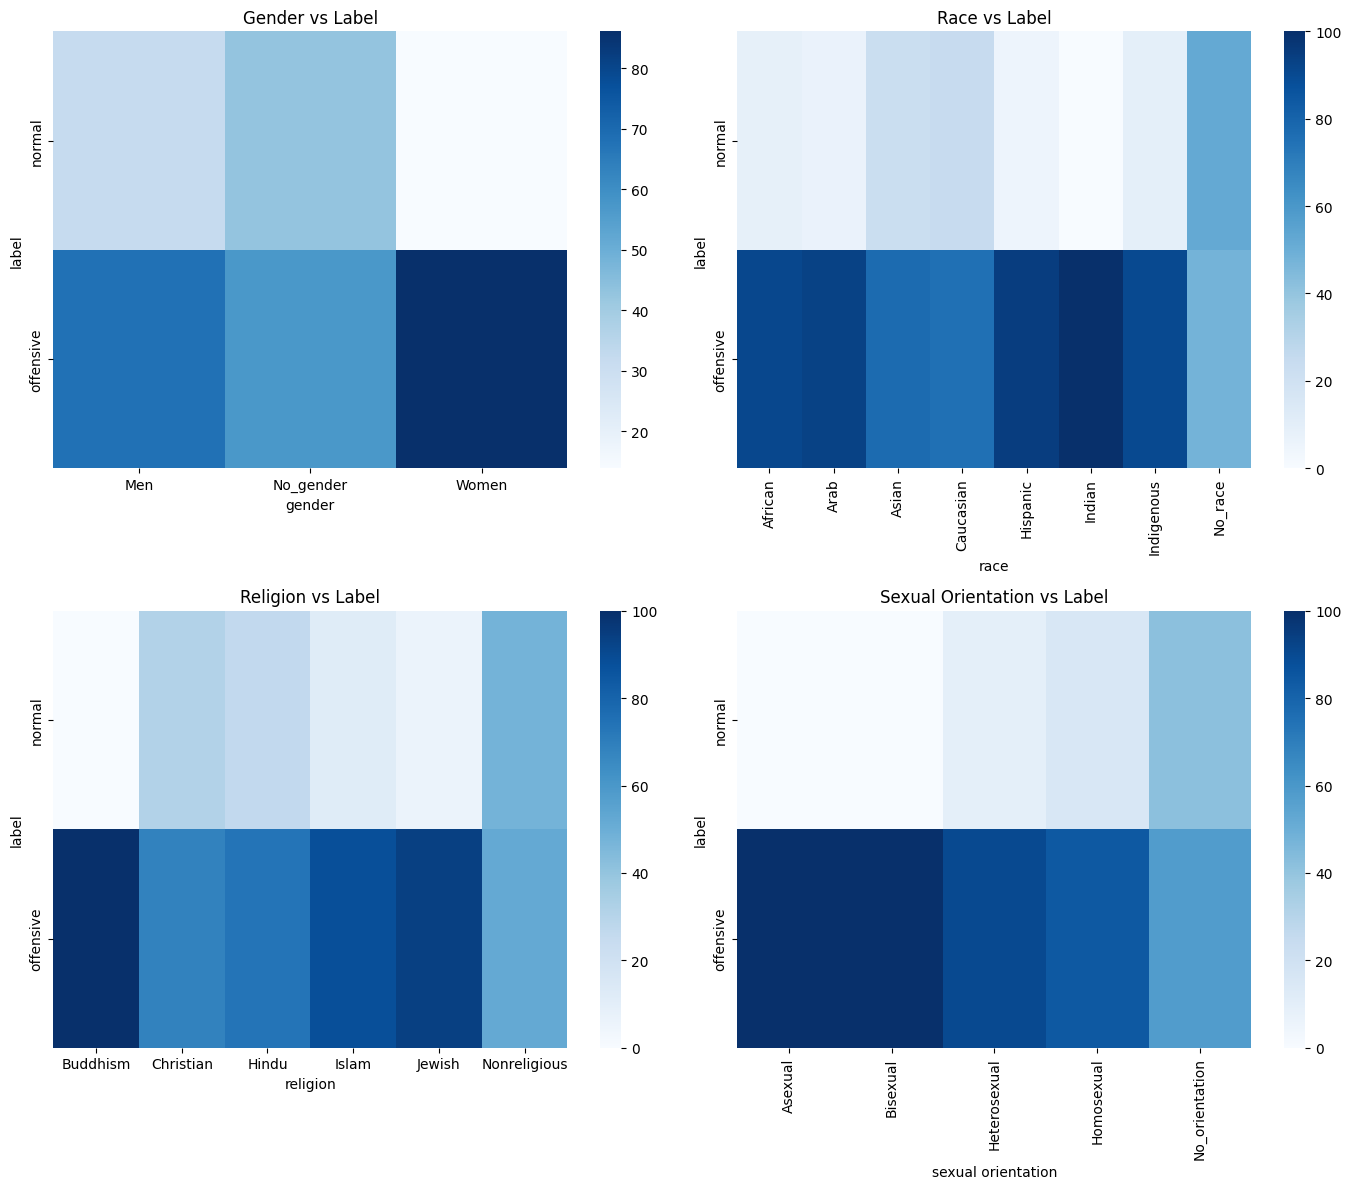

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(gender_label_relation, ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title("Gender vs Label")

sns.heatmap(race_label_relation, ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title("Race vs Label")

sns.heatmap(religion_label_relation, ax=ax[1, 0], cmap='Blues')
ax[1, 0].set_title("Religion vs Label")

sns.heatmap(orientation_label_relation, ax=ax[1, 1], cmap='Blues')
ax[1, 1].set_title("Sexual Orientation vs Label")

plt.tight_layout()
plt.show()

# **Preprocessing and Feature Engineering**
- basic preprocesing
- tokenization
- combine all columns into 1 column

In [29]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


print(preprocess_text("it's just testing. I am Muhammad Hassaan Maqbool conducting the test"))

testing muhammad hassaan maqbool conducting test


In [30]:
processed_df = new_df.copy()
processed_df['comment'] = processed_df['comment'] + ' ' + processed_df['race'] + ' ' + processed_df['religion'] + ' ' + processed_df['gender'] + ' ' + processed_df['sexual orientation']
processed_df = processed_df[['comment', 'label']]
processed_df['comment'] = processed_df['comment'].apply(preprocess_text)
processed_df.head()

,comment,label
0,u lmao wow fuck norace nonreligious nogender n...,normal
1,th floor maybe wow cnn fakenews body count goi...,offensive
2,yr number white woman raped nigger number negr...,offensive
3,h ago ching chong accepted friend request asia...,offensive
4,th century mayhem lawlessness nothing loud mou...,normal


In [31]:
processed_df['label'] = processed_df['label'].map({'normal': 0, 'offensive': 1})
processed_df['label'].value_counts()

label
1    12291
0     7818
Name: count, dtype: int64

# **Modeling and Evaluation**

In [32]:
from scipy.sparse import csr_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [33]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, just_evaluate = False):
    if(just_evaluate == False):
      model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 50)

    return accuracy, conf_matrix, precision

In [34]:
def tune_model_random_search(model, param_dist, x_train, y_train, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42):
    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_dist,
                                       n_iter=n_iter,
                                       cv=cv,
                                       verbose=verbose,
                                       random_state=random_state,
                                       n_jobs=n_jobs)
    random_search.fit(x_train, y_train)
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    return best_model, best_params

In [35]:
def train_and_evaluate_all_models(x_train, x_test, y_train, y_test):
  models = {
  'rfc' : RandomForestClassifier(n_jobs=-1),
  'lg' : LogisticRegression(n_jobs=-1),
  'svc' : SVC(),
  'gnb' : GaussianNB(),
  'xgb' : XGBClassifier(n_jobs=-1)
  }

  for model_name, model in tqdm(models.items(), desc="Training models", total=len(models)):
      print(f"Evaluating model: {model.__class__.__name__}")
      if model_name == 'gnb':
            x_train_dense = x_train.toarray()
            x_test_dense = x_test.toarray()
            train_and_evaluate(model, x_train_dense, x_test_dense, y_train, y_test, False)
      else:
          train_and_evaluate(model, x_train, x_test, y_train, y_test, False)

# **Using TF-IDF Vectorizer**
**Conclusions**
- XGBoost, RandomForest and SVC performed really well with accuracy and precision between 84% to 87%
- Performance of Naive Bayes was poor with accuracy and percision of approximately 50% and 69% respectively
- Considering their initial performance, tried Hyperparameter tuning on XGBoost, Random Forest and SVC. Multiple iterations were tried with randomized hyperparameters to find the best combination, but couldn't find anymore improvements

In [63]:
tfidf = TfidfVectorizer()

x, y = tfidf.fit_transform(processed_df['comment']), processed_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
train_and_evaluate_all_models(x_train, x_test, y_train, y_test)

Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Evaluating model: RandomForestClassifier


Training models:  20%|██        | 1/5 [00:19<01:16, 19.09s/it]

Model: RandomForestClassifier
Accuracy: 0.8580
Precision: 0.8685
Confusion Matrix:
[[1226  337]
 [ 234 2225]]
--------------------------------------------------
Evaluating model: LogisticRegression


Training models:  40%|████      | 2/5 [00:21<00:27,  9.02s/it]

Model: LogisticRegression
Accuracy: 0.8436
Precision: 0.8560
Confusion Matrix:
[[1193  370]
 [ 259 2200]]
--------------------------------------------------
Evaluating model: SVC


Training models:  60%|██████    | 3/5 [02:18<01:57, 58.68s/it]

Model: SVC
Accuracy: 0.8506
Precision: 0.8672
Confusion Matrix:
[[1227  336]
 [ 265 2194]]
--------------------------------------------------
Evaluating model: GaussianNB


Training models:  80%|████████  | 4/5 [02:52<00:48, 48.68s/it]

Model: GaussianNB
Accuracy: 0.5099
Precision: 0.6880
Confusion Matrix:
[[1158  405]
 [1566  893]]
--------------------------------------------------
Evaluating model: XGBClassifier


Training models: 100%|██████████| 5/5 [03:01<00:00, 36.40s/it]

Model: XGBClassifier
Accuracy: 0.8635
Precision: 0.8832
Confusion Matrix:
[[1272  291]
 [ 258 2201]]
--------------------------------------------------


**Hyperparameter Tuning**
Performing tuning on the following algorigthms
- Random Forest Classifier
- XGBoost
- SVC

**Random Forest Hyperparameter Tuning**
- tried multiple iteration on random parameters but didn't see any improvement as compared to default ones

In [38]:
param_rfc = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_features': [None, 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

best_model_rfc, best_params_rfc = tune_model_random_search(RandomForestClassifier(), param_rfc, x_train, y_train)

print("Best Parameters:", best_params_rfc)

train_and_evaluate(best_model_rfc, x_train, x_test, y_train, y_test, True)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Model: RandomForestClassifier
Accuracy: 0.8548
Precision: 0.8787
Confusion Matrix:
[[1206  308]
 [ 276 2232]]
--------------------------------------------------


(0.8547986076578816,
 array([[1206,  308],
        [ 276, 2232]], dtype=int64),
 0.878740157480315)

**XGBoost Hyperparameter Tuning**

In [39]:
param_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

best_model_xgb, best_params_xgb = tune_model_random_search(XGBClassifier(), param_xgb, x_train, y_train)

print("Best Parameters:", best_params_xgb)

train_and_evaluate(best_model_xgb, x_train, x_test, y_train, y_test, True)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Model: XGBClassifier
Accuracy: 0.8541
Precision: 0.8777
Confusion Matrix:
[[1203  311]
 [ 276 2232]]
--------------------------------------------------


(0.8540527100944804,
 array([[1203,  311],
        [ 276, 2232]], dtype=int64),
 0.8777034998033818)

**SVC Hyperparameter Tuning**

In [40]:
param_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

best_model_svc, best_params_svc = tune_model_random_search(SVC(), param_svc, x_train, y_train)

print("Best Parameters:", best_params_svc)

train_and_evaluate(best_model_svc, x_train, x_test, y_train, y_test, True)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': 'balanced', 'C': 100}
Model: SVC
Accuracy: 0.8304
Precision: 0.8566
Confusion Matrix:
[[1147  367]
 [ 315 2193]]
--------------------------------------------------


(0.8304326205867727,
 array([[1147,  367],
        [ 315, 2193]], dtype=int64),
 0.856640625)

# **Using Word2Vec**
**Conclusion**
- Couldn't find any improvements as compared to TF-IDF approach
- Maximum accuracy and precision achieved are 80% and 83% respectively, meanwhile for TF-IDF it accuracy and precisions were more than 84%

In [41]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [42]:
def get_comment_vector_from_words(comment, model):
  words = [word for word in comment if word in model.wv]
  if len(words) == 0:
    return np.zeros(model.vector_size)
  return np.mean([model.wv[word] for word in words], axis=0)

In [43]:
word2vec_df = processed_df[['comment', 'label']]
word2vec_df['comment'] = word2vec_df['comment'].apply(word_tokenize)
word2vec_df.head()

,comment,label
0,"[u, lmao, wow, fuck, norace, nonreligious, nog...",0
1,"[th, floor, maybe, wow, cnn, fakenews, body, c...",1
2,"[yr, number, white, woman, raped, nigger, numb...",1
3,"[h, ago, ching, chong, accepted, friend, reque...",1
4,"[th, century, mayhem, lawlessness, nothing, lo...",0


In [44]:
model = Word2Vec(sentences = word2vec_df['comment'], window=5, min_count=1, workers=4, sg=1)

In [45]:
word2vec_df['wv_vectors'] = word2vec_df['comment'].apply(lambda x: get_comment_vector_from_words(x, model))

In [46]:
x, y = csr_matrix(np.vstack(word2vec_df['wv_vectors'])), word2vec_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [47]:
train_and_evaluate_all_models(x_train, x_test, y_train, y_test)

Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Evaluating model: RandomForestClassifier


Training models:  20%|██        | 1/5 [00:16<01:04, 16.24s/it]

Model: RandomForestClassifier
Accuracy: 0.8028
Precision: 0.8267
Confusion Matrix:
[[1158  434]
 [ 359 2071]]
--------------------------------------------------
Evaluating model: LogisticRegression


Training models:  40%|████      | 2/5 [00:17<00:22,  7.67s/it]

Model: LogisticRegression
Accuracy: 0.7976
Precision: 0.8298
Confusion Matrix:
[[1175  417]
 [ 397 2033]]
--------------------------------------------------
Evaluating model: SVC


Training models:  60%|██████    | 3/5 [01:07<00:53, 26.84s/it]

Model: SVC
Accuracy: 0.8048
Precision: 0.8411
Confusion Matrix:
[[1209  383]
 [ 402 2028]]
--------------------------------------------------
Evaluating model: GaussianNB
Model: GaussianNB
Accuracy: 0.6862
Precision: 0.8266
Confusion Matrix:
[[1282  310]
 [ 952 1478]]
--------------------------------------------------
Evaluating model: XGBClassifier


Training models: 100%|██████████| 5/5 [01:09<00:00, 13.99s/it]

Model: XGBClassifier
Accuracy: 0.8008
Precision: 0.8267
Confusion Matrix:
[[1160  432]
 [ 369 2061]]
--------------------------------------------------


# **GloVe (Twitter Pretrained Model)**
**Conclusion**
- Couldn't see any more improvements even after using both Twitter and Google News Corpus Pretrained Models.
- TF-IDF out performed customer Word2Vec and GloVe

In [48]:
def get_comment_vector_from_glove(comment, embeddings):
  words = [word for word in comment if word in embeddings]
  if len(words) == 0:
    return np.zeros(model.vector_size)
  return np.mean([embeddings[word] for word in words], axis=0)

In [49]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

**Twitter 27B Corpus**

In [50]:
file_id = "1tH_jyhTIPmiomCKeapvSwDjh6aXsFBcP"
output_path = "./glove.twitter.27B.100d.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False, fuzzy=True)
print("Download complete!")

Downloading...
From (original): https://drive.google.com/uc?id=1tH_jyhTIPmiomCKeapvSwDjh6aXsFBcP
From (redirected): https://drive.google.com/uc?id=1tH_jyhTIPmiomCKeapvSwDjh6aXsFBcP&confirm=t&uuid=4a01866b-410f-4a55-b383-eec64ed27beb
To: c:\Users\DELL\Desktop\Projects\NLP--course-work-assessment-1\glove.twitter.27B.100d.zip
100%|██████████| 411M/411M [03:47<00:00, 1.81MB/s] 


Download complete!


In [51]:
zip_path = "./glove.twitter.27B.100d.zip"
extract_folder = "./glove_twitter"

os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File extracted to: {extract_folder}")

File extracted to: ./glove_twitter


In [52]:
twitter_glove_path = "glove_twitter/glove.twitter.27B.100d.txt"
twitter_glove_embeddings = load_glove_embeddings(twitter_glove_path)

print(f"Loaded {len(twitter_glove_embeddings)} word vectors.")

Loaded 1193514 word vectors.


In [53]:
word2vec_df['glove_twitter_vectors'] = word2vec_df['comment'].apply(lambda x: get_comment_vector_from_glove(x, twitter_glove_embeddings))

In [54]:
x, y = csr_matrix(np.vstack(word2vec_df['glove_twitter_vectors'])), word2vec_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [55]:
train_and_evaluate_all_models(x_train, x_test, y_train, y_test)

Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Evaluating model: RandomForestClassifier


Training models:  20%|██        | 1/5 [00:22<01:29, 22.27s/it]

Model: RandomForestClassifier
Accuracy: 0.7476
Precision: 0.7657
Confusion Matrix:
[[ 968  624]
 [ 391 2039]]
--------------------------------------------------
Evaluating model: LogisticRegression


Training models:  40%|████      | 2/5 [00:28<00:37, 12.54s/it]

Model: LogisticRegression
Accuracy: 0.7464
Precision: 0.7662
Confusion Matrix:
[[ 973  619]
 [ 401 2029]]
--------------------------------------------------
Evaluating model: SVC


Training models:  60%|██████    | 3/5 [01:27<01:08, 34.17s/it]

Model: SVC
Accuracy: 0.7723
Precision: 0.7883
Confusion Matrix:
[[1036  556]
 [ 360 2070]]
--------------------------------------------------
Evaluating model: GaussianNB
Model: GaussianNB
Accuracy: 0.7044
Precision: 0.7380
Confusion Matrix:
[[ 909  683]
 [ 506 1924]]
--------------------------------------------------
Evaluating model: XGBClassifier


Training models: 100%|██████████| 5/5 [01:31<00:00, 18.24s/it]

Model: XGBClassifier
Accuracy: 0.7601
Precision: 0.7827
Confusion Matrix:
[[1029  563]
 [ 402 2028]]
--------------------------------------------------


**Google 300B Corpus**

In [56]:
file_id = "1elKVMmcGpvNZJvxwg9enc2B_lOSCjP1t"
output_path = "./GoogleNews-vectors-negative300.bin.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)
print("Download complete!")

Downloading...
From (original): https://drive.google.com/uc?id=1elKVMmcGpvNZJvxwg9enc2B_lOSCjP1t
From (redirected): https://drive.google.com/uc?id=1elKVMmcGpvNZJvxwg9enc2B_lOSCjP1t&confirm=t&uuid=e1e17cbc-1731-42ca-9a53-663a37becbd0
To: c:\Users\DELL\Desktop\Projects\NLP--course-work-assessment-1\GoogleNews-vectors-negative300.bin.zip
100%|██████████| 1.76G/1.76G [16:10<00:00, 1.81MB/s]


Download complete!


In [57]:
zip_path = "./GoogleNews-vectors-negative300.bin.zip"
extract_folder = "./"

os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File extracted to: {extract_folder}")

File extracted to: ./


In [58]:
google_new_model_path = "GoogleNews-vectors-negative300.bin"
google_news_model = gensim.models.KeyedVectors.load_word2vec_format(google_new_model_path, binary=True)

In [59]:
google_news_model.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [60]:
word2vec_df['glove_google_news_vectors'] = word2vec_df['comment'].apply(lambda x: get_comment_vector_from_glove(x, google_news_model))

In [61]:
x, y = csr_matrix(np.vstack(word2vec_df['glove_twitter_vectors'])), word2vec_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [62]:
train_and_evaluate_all_models(x_train, x_test, y_train, y_test)

Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Evaluating model: RandomForestClassifier


Training models:  20%|██        | 1/5 [00:18<01:12, 18.10s/it]

Model: RandomForestClassifier
Accuracy: 0.7464
Precision: 0.7596
Confusion Matrix:
[[ 939  653]
 [ 367 2063]]
--------------------------------------------------
Evaluating model: LogisticRegression


Training models:  40%|████      | 2/5 [00:27<00:38, 12.96s/it]

Model: LogisticRegression
Accuracy: 0.7464
Precision: 0.7662
Confusion Matrix:
[[ 973  619]
 [ 401 2029]]
--------------------------------------------------
Evaluating model: SVC


Training models:  60%|██████    | 3/5 [01:22<01:03, 32.00s/it]

Model: SVC
Accuracy: 0.7723
Precision: 0.7883
Confusion Matrix:
[[1036  556]
 [ 360 2070]]
--------------------------------------------------
Evaluating model: GaussianNB
Model: GaussianNB
Accuracy: 0.7044
Precision: 0.7380
Confusion Matrix:
[[ 909  683]
 [ 506 1924]]
--------------------------------------------------
Evaluating model: XGBClassifier


Training models: 100%|██████████| 5/5 [01:25<00:00, 17.05s/it]

Model: XGBClassifier
Accuracy: 0.7601
Precision: 0.7827
Confusion Matrix:
[[1029  563]
 [ 402 2028]]
--------------------------------------------------
